<h2>Overview</h2>

This project implements an automated machine learning (AutoML) pipeline for classification tasks, leveraging libraries like PyCaret for model setup and hyperparameter tuning tools such as tune-sklearn and Optuna. It aims to automate the process of data preprocessing, model selection, and tuning for optimal performance.

<h2>1. Setup and Library Installation</h2>

Purpose: 
- Install necessary libraries for AutoML, model tuning, and data preprocessing.

In [21]:
!python3 -m pip install pandas
!python3 -m pip install scikit-learn
!python3 -m pip install 'pycaret[full]'
!python3 -m pip install 'pycaret[tuners]'
!python3 -m pip install tensorflow
!python3 -m pip install tune-sklearn 'ray[tune]'
!python3 -m pip install scikit-optimize
!python3 -m pip install hyperopt


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


<h2>2. Data Loading </h2>

Purpose: 
- Load the datasets for training and evaluation.


In [6]:
from pycaret.classification import setup
from pycaret.classification import *
import pandas as pd
import optuna

# 데이터 로드
data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

no_gender_data = data.drop(['id'], axis = 1)
X_test = test_data.drop(['id'], axis = 1)

<h2>3. AutoML Setup Using PyCaret</h2>

Purpose: 
- Set up the PyCaret classification environment, specifying preprocessing steps and target variables.

In [12]:
# PyCaret 환경 설정 
s = setup(no_gender_data, 
          target='Response', 
          session_id=123,
          train_size = 0.85,
          numeric_features=['Age','Annual_Premium', 'Vintage'],
          ordinal_features={'Vehicle_Age': ['< 1 Year', '1-2 Year', '> 2 Years']},
          categorical_features=['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Damage', 'Policy_Sales_Channel'],
          fold = 2, #cross-validation subset의 갯수를 2개로 지정
          preprocess = True,
          use_gpu = True,
          )

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the prov

[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recomp

,Description,Value
0,Session id,123
1,Target,Response
2,Target type,Binary
3,Original data shape,"(11504798, 11)"
4,Transformed data shape,"(11504798, 11)"
5,Transformed train set shape,"(9203838, 11)"
6,Transformed test set shape,"(2300960, 11)"
7,Ordinal features,1
8,Numeric features,3
9,Categorical features,6


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the prov

[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


<h2>4. Model Comparison</h2>

Purpose: 
- Identify the best-performing model from a suite of machine learning algorithms.

In [13]:
#best_model = compare_models(include = ['xgboost', 'lightgbm'], sort = 'AUC', probability_threshold=1.0)
#best_model = create_model('lightgbm', probability_threshold=1.0) 
best_model = create_model('xgboost', probability_threshold=1.0) #xgboost 성능 올릴 방법론 필요
compare_models()
"""
A. compare_models() - 여러개의 모델들을 학습시키고 가장 성능이 뛰어난 모델을 출력합니다.

B. create_model() - 한 개의 모델을 학습시키고 출력합니다.
"""

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8770,0.8782,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8770,0.8778,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.8770,0.8780,0.0000,0.0000,0.0000,0.0000,0.0000
Std,0.0000,0.0002,0.0000,0.0000,0.0000,0.0000,0.0000


In [ ]:
get_config('X_test')

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
2289185,Male,25,1,30.0,1,< 1 Year,No,29073.0,152.0,206
5131682,Male,35,1,28.0,0,1-2 Year,Yes,30371.0,163.0,167
9120194,Male,58,1,28.0,0,1-2 Year,Yes,60521.0,26.0,194
10932476,Female,54,1,29.0,0,1-2 Year,No,2630.0,124.0,151
8407498,Male,46,1,28.0,0,1-2 Year,Yes,37243.0,26.0,83
...,...,...,...,...,...,...,...,...,...,...
1161010,Male,33,1,20.0,1,1-2 Year,No,2630.0,124.0,166
6641503,Male,60,1,28.0,0,1-2 Year,Yes,47970.0,124.0,52
4571855,Female,38,1,30.0,1,1-2 Year,No,28698.0,124.0,165
9357857,Male,20,1,39.0,0,1-2 Year,Yes,2630.0,156.0,165


<h2>5. Hyperparameter Tuning with Tune-Sklearn</h2>

Purpose: 
- Perform hyperparameter optimization using tune-sklearn.

In [32]:
tuned_model_RGS = tune_model(
    best_model, 
    optimize = 'auc', # 0.8784
    )

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8770,0.8786,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8770,0.8783,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.8770,0.8784,0.0000,0.0000,0.0000,0.0000,0.0000
Std,0.0000,0.0002,0.0000,0.0000,0.0000,0.0000,0.0000


Fitting 2 folds for each of 10 candidates, totalling 20 fits


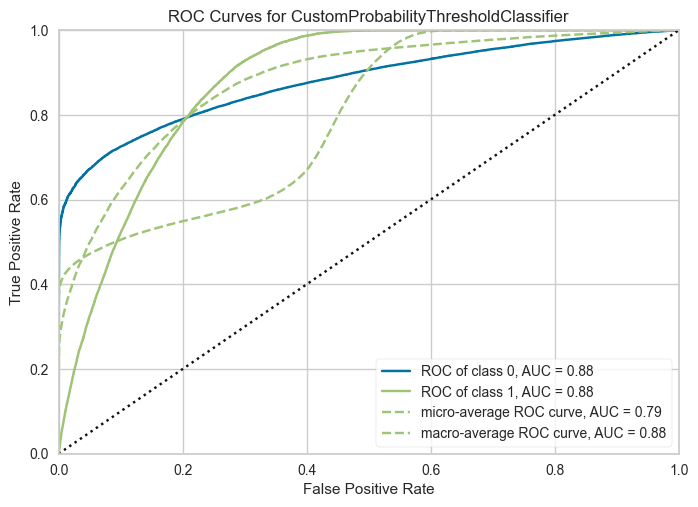

In [203]:
plot_model(tuned_model, plot = 'auc')

<h2>6. Finalization</h2>

- Train the hold-sout set. 

In [204]:
# Fianlizes the training by training the hold-out set
finalized = finalize_model(tuned_model)

<h2>7. Model Deployment</h2>

Purpose: 
- Save and reload the best-performing model for deployment.


In [205]:
save_model(finalized, 'xgboost_2fold_training99_id_removed_20iter') # 이따 다시 저장하기
loaded_model = load_model('/Users/jeahyukjeong/Desktop/CS_Project/Playground_4_7/playground-series-s4e7/xgboost_2fold_training99_id_removed_20iter')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Annual_Premium',
                                              'Vintage'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Gender',...
                                                       gamma=None,
                             

<h2>8. SHAP</h2>

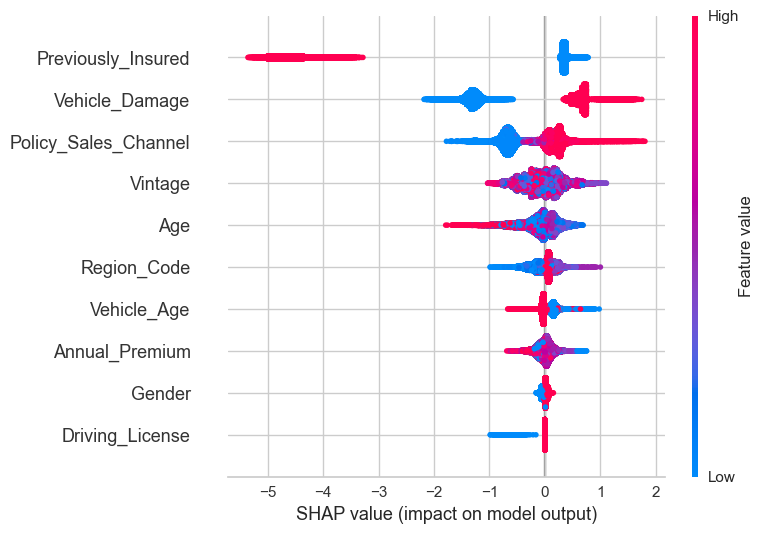

In [207]:
interpret_model(best_model)

<h2>9. Prediction</h2>
Purpose: 
- Generate predictions on the test dataset and save results for submission.

In [208]:
#prediction = predict_model(finalized, data = X_test)
prediction = predict_model(loaded_model, data = X_test)

<h2>10. submission</h2>

In [209]:
submission = pd.DataFrame(prediction)
final_submission = test_data[['id']]
final_submission['Response'] = 1 - submission['prediction_score']
final_submission.to_csv('submission2.csv', index=False)
final_submission

